## Problem Statement

### Topic: Health Insurance Lead Prediction

Your Client FinMan is a financial services company that provides various financial
services like loan, investment funds, insurance etc. to its customers. FinMan wishes to
cross-sell health insurance to the existing customers who may or may not hold insurance
policies with the company. The company recommend health insurance to it's customers
based on their profile once these customers land on the website. Customers might browse the
recommended health insurance policy and consequently fill up a form to apply. **When these
customers fill-up the form, their Response towards the policy is considered positive
and they are classified as a lead.**

Once these leads are acquired, the sales advisors approach them to convert and thus the
company can sell proposed health insurance to these leads in a more efficient manner. Now the company needs your help in building a model to predict whether the person will
be interested in their proposed Health plan/policy given the information about:

- Demographics (city, age, region etc.) 
- Information regarding holding policies of the customer 
- Recommended Policy Information

In [1]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading data
train = pd.read_csv(r'C:\Users\Ranjeet shrivastav\Videos\ML_algorithms\Health Insurance Lead Prediction\train.csv')
test = pd.read_csv(r'C:\Users\Ranjeet shrivastav\Videos\ML_algorithms\Health Insurance Lead Prediction\test.csv')

In [3]:
train.shape, test.shape

((50882, 14), (21805, 13))

In [4]:
train.head(2)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0


Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [5]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index = True)

In [6]:
data.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age,source
0,Rented,C3,X1,14+,3.0,1,No,36,Individual,22,11628.0,3213,0.0,36,train
1,Owned,C5,X2,NaN,NaN,2,No,22,Joint,22,30510.0,1117,0.0,75,train
2,Owned,C5,NaN,1.0,1.0,3,No,32,Individual,19,7450.0,3732,1.0,32,train
3,Owned,C24,X1,14+,3.0,4,No,48,Joint,19,17780.0,4378,0.0,52,train
4,Rented,C8,X2,3.0,1.0,5,No,44,Individual,16,10404.0,2190,0.0,44,train


In [7]:
data.shape

(72687, 15)

In [8]:
data.dtypes

Accomodation_Type           object
City_Code                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
ID                           int64
Is_Spouse                   object
Lower_Age                    int64
Reco_Insurance_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Region_Code                  int64
Response                   float64
Upper_Age                    int64
source                      object
dtype: object

In [9]:
data.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
source                         0
dtype: int64

Note that the 'Response' is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in 'Health Indicator', 'Holding_Policy_Duration' and 'Holding_Policy_Type' in the data cleaning section.

In [10]:
data.nunique()

Accomodation_Type              2
City_Code                     36
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
ID                         72687
Is_Spouse                      2
Lower_Age                     60
Reco_Insurance_Type            2
Reco_Policy_Cat               22
Reco_Policy_Premium         7685
Region_Code                 5538
Response                       2
Upper_Age                     58
source                         2
dtype: int64

In [11]:
data['Health Indicator'].value_counts()

X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

In [12]:
data['Health Indicator'].replace(to_replace='X1', value='0', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X2', value='1', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X3', value='2', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X4', value='3', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X5', value='4', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X6', value='5', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X7', value='6', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X8', value='7', regex=True, inplace=True)
data['Health Indicator'].replace(to_replace='X9', value='8', regex=True, inplace=True)

In [13]:
data['Holding_Policy_Duration'].value_counts()

1.0     6390
14+     6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

In [14]:
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].replace('14+','14.0')

In [15]:
data['Is_Spouse'].value_counts()

No     60687
Yes    12000
Name: Is_Spouse, dtype: int64

In [16]:
data['Is_Spouse'] = data['Is_Spouse'].replace('Yes',1)
data['Is_Spouse'] = data['Is_Spouse'].replace('No',0)

In [17]:
data.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age,source
0,Rented,C3,0,14.0,3.0,1,0,36,Individual,22,11628.0,3213,0.0,36,train
1,Owned,C5,1,NaN,NaN,2,0,22,Joint,22,30510.0,1117,0.0,75,train
2,Owned,C5,NaN,1.0,1.0,3,0,32,Individual,19,7450.0,3732,1.0,32,train
3,Owned,C24,0,14.0,3.0,4,0,48,Joint,19,17780.0,4378,0.0,52,train
4,Rented,C8,1,3.0,1.0,5,0,44,Individual,16,10404.0,2190,0.0,44,train


## data cleaning

In [18]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values) 

filling null values with randomly same column values

In [19]:
data['Health Indicator'] = na_randomfill(data['Health Indicator'])
data['Holding_Policy_Duration'] = na_randomfill(data['Holding_Policy_Duration'])
data['Holding_Policy_Type'] = na_randomfill(data['Holding_Policy_Type'])

In [20]:
data.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
source                         0
dtype: int64

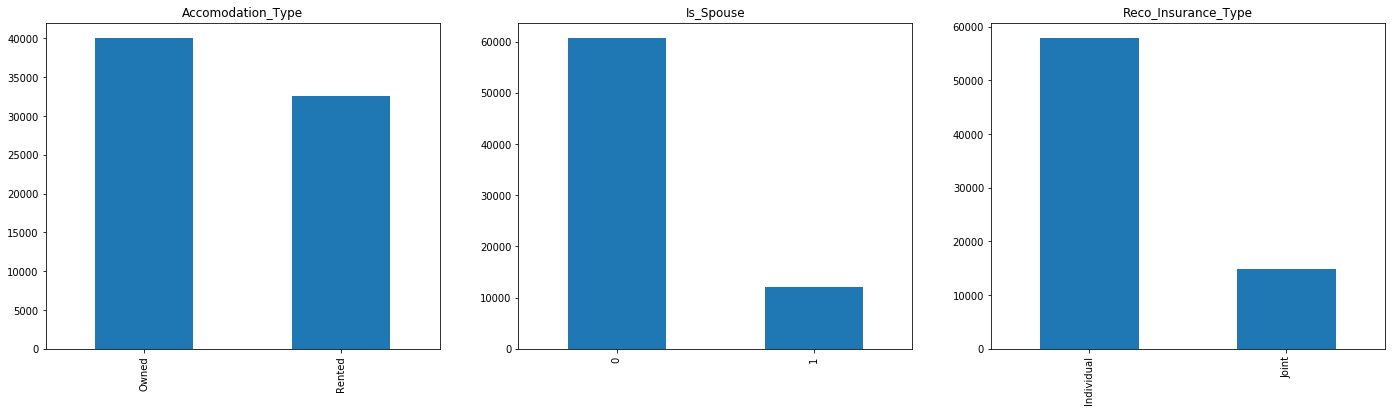

In [21]:
plt.subplot(131)
data['Accomodation_Type'].value_counts().plot.bar(figsize=(24,6),title='Accomodation_Type')

plt.subplot(132)
data['Is_Spouse'].value_counts().plot.bar(title='Is_Spouse')

plt.subplot(133)
data['Reco_Insurance_Type'].value_counts().plot.bar(title='Reco_Insurance_Type')

plt.show()

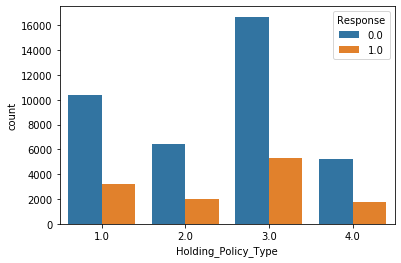

In [22]:
sns.countplot(hue='Response',x='Holding_Policy_Type',data=data)

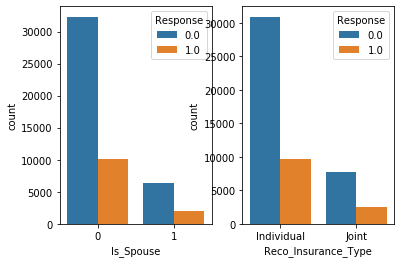

In [23]:
plt.subplot(121)
sns.countplot(x='Is_Spouse',hue='Response',data=data)

plt.subplot(122)
sns.countplot(x='Reco_Insurance_Type',hue='Response',data=data)

plt.show()

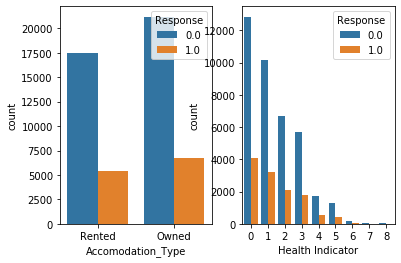

In [24]:
plt.subplot(121)
sns.countplot(x='Accomodation_Type',hue='Response',data=data)

plt.subplot(122)
sns.countplot(x='Health Indicator',hue='Response',data=data)

plt.show()

replacing values(5,6,7,8) with value(4).as you can see 5,6,7,8 didn't have much impact on response.

In [25]:
data['Health Indicator'].replace('7','4',inplace=True)
data['Health Indicator'].replace('8','4',inplace=True)
data['Health Indicator'].replace('5','4',inplace=True)
data['Health Indicator'].replace('6','4',inplace=True)

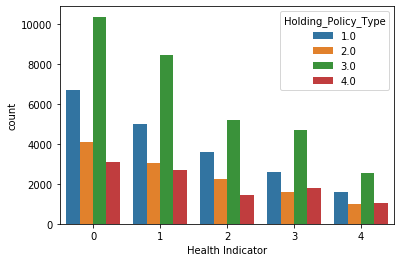

In [26]:
sns.countplot(x='Health Indicator',hue='Holding_Policy_Type',data=data)

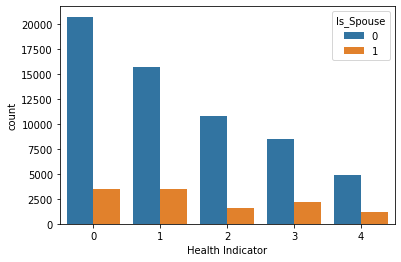

In [27]:
sns.countplot(x='Health Indicator',hue='Is_Spouse',data=data)

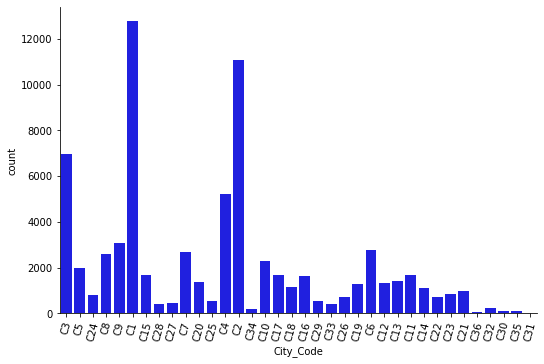

In [28]:
g = sns.factorplot("City_Code", data=data, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=75)

In [29]:
data.corr()

,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
Holding_Policy_Type,1.000000,0.006011,0.063155,0.068833,0.046751,0.074336,0.002804,0.009312,0.079849
ID,0.006011,1.000000,-0.003041,0.000758,0.000315,0.001245,0.004074,0.005159,0.000066
Is_Spouse,0.063155,-0.003041,1.000000,0.058470,0.021489,0.510928,-0.002264,0.003859,0.198134
Lower_Age,0.068833,0.000758,0.058470,1.000000,0.020116,0.613374,-0.004750,-0.002099,0.921175
Reco_Policy_Cat,0.046751,0.000315,0.021489,0.020116,1.000000,0.060442,-0.062533,0.114321,0.024325
Reco_Policy_Premium,0.074336,0.001245,0.510928,0.613374,0.060442,1.000000,-0.013772,0.007943,0.791562
Region_Code,0.002804,0.004074,-0.002264,-0.004750,-0.062533,-0.013772,1.000000,0.001121,-0.006170
Response,0.009312,0.005159,0.003859,-0.002099,0.114321,0.007943,0.001121,1.000000,0.002772
Upper_Age,0.079849,0.000066,0.198134,0.921175,0.024325,0.791562,-0.006170,0.002772,1.000000


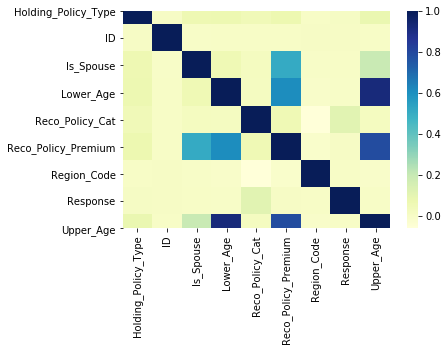

In [30]:
sns.heatmap(data.corr(),cmap="YlGnBu")

Let's check the distribution of Reco_Policy_Premium

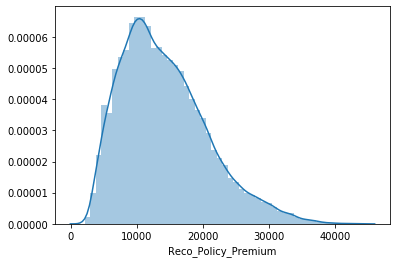

In [31]:
sns.distplot(data['Reco_Policy_Premium'])

we can see it shifted towards left, i.e.,the distribution is right skewed. so, let's take the log transfomation to make the distribution normal.

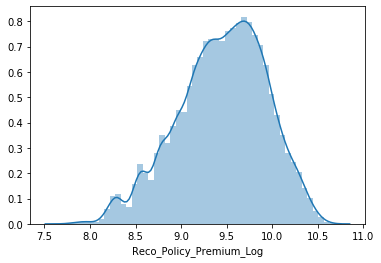

In [32]:
data['Reco_Policy_Premium_Log'] = np.log(data['Reco_Policy_Premium'])
sns.distplot(data['Reco_Policy_Premium_Log'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

In [33]:
data.dtypes

Accomodation_Type           object
City_Code                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
ID                           int64
Is_Spouse                    int64
Lower_Age                    int64
Reco_Insurance_Type         object
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Region_Code                  int64
Response                   float64
Upper_Age                    int64
source                      object
Reco_Policy_Premium_Log    float64
dtype: object

In [34]:
#One Hot InCoding:
data = pd.get_dummies(data, columns=['City_Code','Accomodation_Type','Health Indicator','Holding_Policy_Type','Holding_Policy_Duration',
          'Reco_Insurance_Type'])

In [35]:
data.shape

(72687, 73)

Let's convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [36]:

train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Response','source'],axis=1,inplace=True)
train.drop(['source','ID'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

## Model Building

I would like to define a generic function which takes the algorithm and data as input and makes the model, performs roc_auc_score and generates submission.

In [37]:
#define target and ID column
target = 'Response'
IDcol = ['ID','Upper_Age']

from sklearn.metrics import roc_auc_score
from sklearn import metrics
def modelfit(alg, dtrain, dtest, pred, target, IDcol, filename):
    #fit the algorithm on the data
    alg.fit(dtrain[pred], dtrain[target])
    
    #predict training set
    dtrain_pred = alg.predict_proba(dtrain[pred])[:, 1]
    print("auc_score : %.4g" % roc_auc_score(dtrain[target].values, dtrain_pred))
    #Predict on testing data:
    dtest[target] = alg.predict_proba(dtest[pred])[:, 1]
    
    
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    del submission['Upper_Age']
    submission.to_csv(filename, index=False)
    
    

In [41]:
from lightgbm import LGBMClassifier
pred = [x for x in train.columns if x not in [target]+IDcol]
alg4 = LGBMClassifier(learning_rate = 0.01,
                      max_depth = 10,
                      num_leaves = 80,
                      n_estimators = 650)
modelfit(alg4, train, test, pred, target, IDcol, 'lgb1.csv')


auc_score : 0.7867


AV private Leaderboard score:0.6675

AV final rank:334